In [1]:
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity7.ipynb")

# In-class coding exercise #7
Objective: In this exercise you will practice using advanced pandas functions, such as`groupby()`, `resample()`, and `rolling`.

## Introduction to group coding exercises
Today you’ll work on this exercise in new groups of 3-4, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the “Uploader”. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1. Caitlyn
2. Maggie
3. Ethan

# Q1: Primary Productivity from Station ALOHA

Today, we will be analyzing primary production data from Station ALOHA. 

"Station ALOHA is the focal point of a range of oceanographic studies conducted over great temporal scale that intend to understand and explain the trends of the greater North Pacific Ocean." [Source](https://aco-ssds.soest.hawaii.edu/ALOHA/)

Primary production is the measurement of carbon accumulated by photosynthesis. This term represents how much carbon is stored by unit volume and is calculated via the 14C-assimilation method. [Reference](https://hahana.soest.hawaii.edu/hot/protocols/protocols.html?Chapter=14)

<img src = "https://i.ibb.co/Bf2Rt1b/station-aloha.png" width = 500>

## Part 1 (10 minutes)
Here, we will be downloading data via Simons CMAP as we did the previous week. Use the link to the dataset [(here)](https://simonscmap.com/catalog/datasets/HOT_PP_v2022) to view the metadata and get units for your plots.

1) Using the starter code, fill in the `key` variable with your own API key from CMAP. If you haven't already generated an API key, create one [here](https://simonscmap.com/apikeymanagement). 

2) Once you have run the starter code, set the "time" column of the `hot_df` DataFrame to `datetime` using the `pandas.to_datetime()` function. 

3) Sort `hot_df` by the "time" column using the `pandas.sort_values()` function. 

4) Primary production measurements were taken at discrete (individual or separate) depths. To smooth some of the data, create a new column named "round_depth" that contains the rounded depth to **20 m**. 

_HINT_: Review this week's demo on how to do this!

In [13]:
import pycmap
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
# fill in your key
key = "b446c0c3-432c-44db-8281-fedeecdc935c"                    
#call the CMAP API using your unique key
api = pycmap.API(token=key)
# grab the dataset from the API
hot_df = api.get_dataset('tblHOT_PP_v2022')

# display your dataframe
display(hot_df) #displaying the data, seeing what we have
# your code 
hot_df['time'] = pd.to_datetime(hot_df['time']) # using the to_datetime function to convert to datetime function
hot_df = hot_df.sort_values(['time']) #sorting the time column function

print(hot_df) # printing the new column function

hot_df['round_depth'] = (hot_df['depth'] // 20 * 20) # similar to the demo on tuesday, // 20 * 20 
print(hot_df['round_depth']) # this makes a new column with new rounded depths

,time,lat,lon,depth,cruise,stime,etime,itype,chl,phaeo,l12,d12,bsal,pbact,hbact,sbact,ebact
0,1988-10-31T00:00:00,22.75,-158,24,HOT001,NaN,NaN,0,0.129,0.077,12.21,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-10-31T00:00:00,22.75,-158,42,HOT001,NaN,NaN,0,0.192,0.051,2.47,0.07,NaN,NaN,NaN,NaN,NaN
2,1988-10-31T00:00:00,22.75,-158,68,HOT001,NaN,NaN,0,0.285,0.303,2.58,0.06,NaN,NaN,NaN,NaN,NaN
3,1988-10-31T00:00:00,22.75,-158,114,HOT001,NaN,NaN,0,0.326,0.044,0.72,0.16,NaN,NaN,NaN,NaN,NaN
4,1988-12-02T00:00:00,22.75,-158,0,HOT002,NaN,NaN,0,0.202,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,2022-09-01T00:00:00,22.75,-158,75,HOT339,443.0,1948.0,2,0.180,0.227,NaN,NaN,35.1478,200248.0,370916.0,1742.0,910.0
2585,2022-09-01T00:00:00,22.75,-158,100,HOT339,443.0,1948.0,2,0.208,0.578,NaN,NaN,35.1896,121881.0,251964.0,150.0,1067.0
2586,2022-09-01T00:00:00,22.75,-158,125,HOT339,443.0,1948.0,2,0.130,0.418,NaN,NaN,35.1410,24478.0,200659.0,7.0,790.0
2587,2022-09-01T00:00:00,22.75,-158,150,HOT339,443.0,1948.0,2,0.076,0.310,NaN,NaN,35.0502,13892.0,161622.0,10.0,409.0


           time    lat  lon  depth  cruise  stime   etime  itype    chl   
0    1988-10-31  22.75 -158     24  HOT001    NaN     NaN      0  0.129  \
1    1988-10-31  22.75 -158     42  HOT001    NaN     NaN      0  0.192   
2    1988-10-31  22.75 -158     68  HOT001    NaN     NaN      0  0.285   
3    1988-10-31  22.75 -158    114  HOT001    NaN     NaN      0  0.326   
4    1988-12-02  22.75 -158      0  HOT002    NaN     NaN      0  0.202   
...         ...    ...  ...    ...     ...    ...     ...    ...    ...   
2583 2022-09-01  22.75 -158     45  HOT339  443.0  1948.0      2  0.139   
2584 2022-09-01  22.75 -158     75  HOT339  443.0  1948.0      2  0.180   
2585 2022-09-01  22.75 -158    100  HOT339  443.0  1948.0      2  0.208   
2586 2022-09-01  22.75 -158    125  HOT339  443.0  1948.0      2  0.130   
2588 2022-09-01  22.75 -158    175  HOT339  443.0  1948.0      2  0.038   

      phaeo    l12   d12     bsal     pbact     hbact   sbact   ebact  
0     0.077  12.21   NaN   

In [11]:
grader.check("Question 1, Part 1")

Question 1, Part 1 results: All test cases passed!

## Part 2 (15 minutes)
There are two types of production measurements in our dataframe: light incubations and dark incubations. We will check our dataframe to see how many measurements of each incubation type are present. 

1) Using the `loc` function, subset your `hot_df` dataframe for rows such that the "l12" column is **not null**. Store your new dataframe in the `good_light` answer variable. _HINT_: Use the `notnull()` function [(Source)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html)

2) Perform the same operation for the "d12" column. Store your subsetted dataframe in the `good_dark` dataframe. 

3) Using the `len()` function, print the number of rows for each subsetted dataframe. Which dataframe contains more rows?

In [25]:
# answer variables
good_light = hot_df.loc[hot_df["l12"].notnull()] #calls the columns with .loc
good_dark = hot_df.loc[hot_df["d12"].notnull()] # using .notnull function to get rid of nan values

length_light = len(good_light) # gives us the length of each of these rows
length_dark = len(good_dark)

# print statements
print(length_light) # printing the length of the columns, light has more columns
print(length_dark)

2153
900


In [24]:
grader.check("Question 1, Part 2")

Question 1, Part 2 results: All test cases passed!

## Part 3 (30 minutes)
Plot the depth profile of primary production as a time series. Since there were more light incubation measurements taken, we will continue using the "l12" column in `hot_df`. 

1) There are replicate samples taken throughout the cruise, so we will first aggregate these samples by taking the mean. We will group on the "time", "lat", "lon", "round_depth", "cruise" columns. Store these column names a list in the `indices` variable. 

2) Using the `groupby()` function, aggregate the `good_light` dataframe by `indices` and calculate the mean. Store your grouped dataframe in the `hot_df_grouped` variable.

3) Drop the "cruise" index using the `droplevel()` function and update your `hot_df_grouped` variable.

4) Reformat your `hot_df_grouped` dataframe into an `xarray Dataset` following the code from last week's group activity. Store your xarray Dataset in the `hot_xr` variable. 

5) Calculate the means across latitude and longitude for the "l12" data variable in `hot_xr` and store it in the `light_ts` variable.

6) Create a contour plot using `contourf()`. Choose a color map and experiment with your "vmin", "vmax", and "levels" arguments. Don't forget your required plot elements! 

7) Answer the following question in a comment or markdown cell below your plot:

>a) What do you notice about productivity vs. time? productivity vs. depth?

>b) Do you see any patterns? Why or why not?

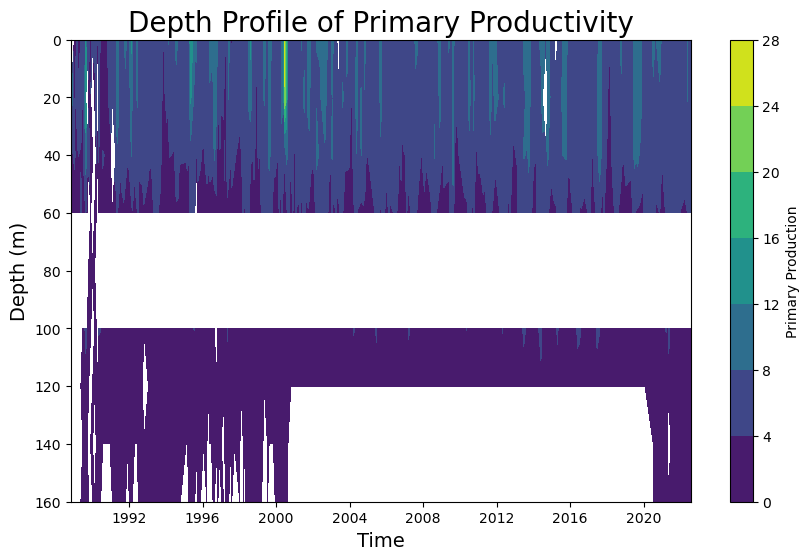

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# answer variables
indices = ['time', 'lat', 'lon', 'round_depth', 'cruise']
hot_df_grouped = good_light.groupby(indices).mean() #using the groupbyto aggregate the good_light dataframe by indices
hot_df_grouped = hot_df_grouped.droplevel('cruise') #using droplevel to drop the cruise index

hot_xr = xr.Dataset.from_dataframe(hot_df_grouped) # converted to xaraay
#print(hot_xr) just to see if it worked
light_ts = hot_xr.mean(['lat', 'lon'])

# your code for plotting
fig = plt.figure(figsize = (10,6))


# plot resmaple annual values
plt.contourf(light_ts['time'], light_ts["round_depth"], light_ts['l12'].values.transpose() ,
        label='Primary Production')
plt.gca().invert_yaxis()
#set labels
plt.ylabel("Depth (m)", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.title("Depth Profile of Primary Productivity", fontsize=20)

plt.colorbar(label = 'Primary Production')
ax.grid(alpha=0.5)


In [44]:
print(light_ts['time'].shape, light_ts["round_depth"].shape, light_ts['l12'].values.shape)

(304,) (9,) (304, 9)


In [56]:
grader.check("Question 1, Part 3")

Question 1, Part 3 results:
    Question 1, Part 3 - 1 result:
        ✅ Test case passed

    Question 1, Part 3 - 2 result:
        ✅ Test case passed

    Question 1, Part 3 - 3 result:
        ❌ Test case failed
        Trying:
            light_ts.shape
        Expecting:
            (304, 9)
        **********************************************************************
        Line 1, in Question 1, Part 3 2
        Failed example:
            light_ts.shape
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 1, Part 3 2[0]>", line 1, in <module>
                light_ts.shape
              File "/opt/conda/lib/python3.10/site-packages/xarray/core/common.py", line 277, in __getattr__
                raise AttributeError(
            AttributeError: 'Dataset' object has no attribute 'shape'

    Question 1, Part 3 - 4 message: Check your indices variable!

    Question 1, Part 3 - 4 result:
        ❌ Test case failed
        Trying:
            light_ts.shape == (304, 9)
        Expecting:
            True
        **********************************************************************
        Line 1, in Question 1, Part 3 3
        Failed example:
            light_ts.shape == (304, 9)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 1, Part 3 3[0]>", line 1, in <module>
                light_ts.shape == (304, 9)
              File "/opt/conda/lib/python3.10/site-packages/xarray/core/common.py", line 277, in __getattr__
                raise AttributeError(
            AttributeError: 'Dataset' object has no attribute 'shape'

## Part 4 (30 minutes)
Now, we will take a look at the data in different time resolutions. First, we will resample the data into monthly means. Next, we will take a yearly rolling average across the months. 

1) Set the index of `hot_df` to the "time" column and store the new dataframe as `hot_df_time`. 

2) Use the `resample()` function to take montly means across the "l12" column of `hot_df_time`. Store these resampled values in `light_resamp`. 

3) Take the yearly rolling average across `light_resamp`. Set the arguments: "center = True" and "min_periods = 6". These will ensure that your data is centered and smooths missing data values. _HINT_: How many months are in a year? Store your rolling averages in the `light_roll` variable. 

4) Create a figure of with your monthly resampled values and your yearly rolling averages. Plot these data as 2 different colors and give the markers. Include a legend, axis labels, and appropriate font sizes. 

5) Answer the following questions in a comment or markdown cell below your plot: 

>a) What do you notice about the overall productivity? Keep in mind that these includes all depths. 

>b) What kind of questions can you ask about the resampled monthly data? What about the rolling yearly averages? How do these results differ?

In [ ]:
# answer variables
hot_df_time = ""
light_resamp = ""
light_roll = ""

# your code for plotting

In [ ]:
grader.check("Question 1, Part 4")

<!-- BEGIN QUESTION -->

## Part 5 (20 minutes)
Finally, we will look at the seasonal changes of production at Station ALOHA. 

1) Create a new index named `months` by finding the months from `hot_df_time`. (_HINT_: Check this week's Lesson 15 prelecture demo on how to do this.)

2) Use `groupby()` on the `hot_df_time` "l12" column to find the means for each month. Store this variable in `month_means`. 

3) Following the same step in 2), calculate the standard errors (`sem()`) for each month. Store this variable in `month_sems`. 

4) Create a barplot of your monthly mean production. Include an error bar using the "yerr" argument. Include a legend, axis labels, and appropriate font sizes. (_HINT_: Review week 7 prelecture demo code from Lesson 11)

5) Answer the following questions in a comment or markdown cell below your plot: 

>a) What patterns in monthly productivity do you see? 

>b) What is the range in standard error? 

>c) What does this say about the variability in productivity month to month? year to year?

In [ ]:
# answer variables
months = ""
month_means = ""
month_sems = ""

# code for plotting


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Optional (only attempt if you've finished the Parts 1-4 and still have time!)

In July of 2000, there was a peak in productivity and chlorophyll, signifying a phytoplankton bloom. Here, we will investigate this phenomenon in more detail. 

1) Subset your `hot_df_time` dataframe from "2000-01-01" to "2001-01-01". 

2) Follow the steps from part 3 to format and plot your subsetted data for the "l12 column. 

3) Create a similar plot for Chlorophyll. 

4) Answer the following questions: 

>a) What is the general relationship between chlorophyll and primary productivity?

>b) Do they always align? When? When do they not align?

>c) Why do you think so?

In [ ]:
# your code 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)
The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1. We excelled at the first two parts, pulling code from the live demos in class and last week's activity.
2. We stuggled the most with coding in part 3 and pulling the code to convert it into an xarray
3. We did not complete all of part 3 and any of part 4.
4. Maybe reviewing the resample functions since we did not get to that in this activity.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()